Band Members:
[('Billy Corgan', 'James Iha'), ('Billy Corgan', 'Jimmy Chamberlin'), ('Billy Corgan', 'Katie Cole'), ('Billy Corgan', "D'arcy Wretzky"), ('Billy Corgan', 'Melissa Auf der Maur'), ('Billy Corgan', 'Ginger Pooley'), ('Billy Corgan', 'Mike Byrne'), ('Billy Corgan', 'Nicole Fiorentino'), ('James Iha', 'Jimmy Chamberlin'), ('James Iha', 'Katie Cole'), ('James Iha', "D'arcy Wretzky"), ('James Iha', 'Melissa Auf der Maur'), ('James Iha', 'Ginger Pooley'), ('James Iha', 'Mike Byrne'), ('James Iha', 'Nicole Fiorentino'), ('Jimmy Chamberlin', 'Katie Cole'), ('Jimmy Chamberlin', "D'arcy Wretzky"), ('Jimmy Chamberlin', 'Melissa Auf der Maur'), ('Jimmy Chamberlin', 'Ginger Pooley'), ('Jimmy Chamberlin', 'Mike Byrne'), ('Jimmy Chamberlin', 'Nicole Fiorentino'), ('Katie Cole', "D'arcy Wretzky"), ('Katie Cole', 'Melissa Auf der Maur'), ('Katie Cole', 'Ginger Pooley'), ('Katie Cole', 'Mike Byrne'), ('Katie Cole', 'Nicole Fiorentino'), ("D'arcy Wretzky", 'Melissa Auf der Maur'), ("D'arcy 

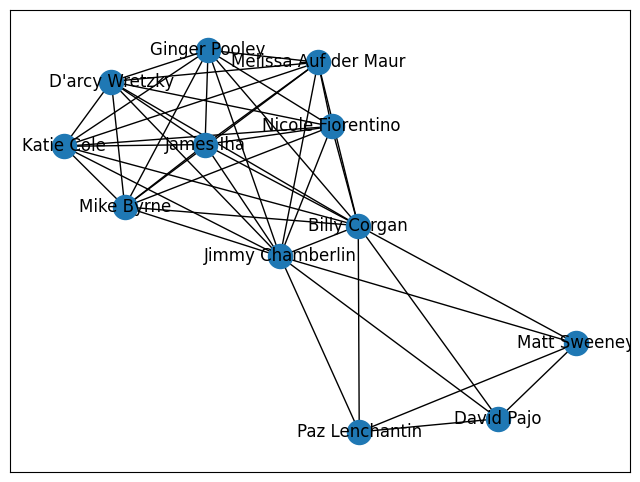

,BetweennessCentrality,DegreeCentrality,ClosenessCentrality
Billy Corgan,0.190909,1.000000,1.000000
James Iha,0.000000,0.727273,0.785714
Jimmy Chamberlin,0.190909,1.000000,1.000000
Katie Cole,0.000000,0.727273,0.785714
D'arcy Wretzky,0.000000,0.727273,0.785714
Melissa Auf der Maur,0.000000,0.727273,0.785714
Ginger Pooley,0.000000,0.727273,0.785714
Mike Byrne,0.000000,0.727273,0.785714
Nicole Fiorentino,0.000000,0.727273,0.785714
Paz Lenchantin,0.000000,0.363636,0.611111


In [2]:
# 1. Import the necessary libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# 2. Create a function to generate combinations
def get_combinations(input_list):
    """
    Generate all possible combinations of pairs within a list.

    Args:
        input_list (list): The input list.

    Returns:
        list: A list of tuples representing all possible combinations of pairs.

    """
    combinations_list = list(combinations(input_list, 2))
    return combinations_list

if __name__ == "__main__":
    # 3. Create a list for each band that contains the members
    smashing_pumpkins = ['Billy Corgan',
                        'James Iha', 
                        'Jimmy Chamberlin',
                        'Katie Cole',
                        'D\'arcy Wretzky', 
                        'Melissa Auf der Maur', 
                        'Ginger Pooley', 
                        'Mike Byrne',
                        'Nicole Fiorentino']

    zwan = ['Billy Corgan', 
            'Jimmy Chamberlin', 
            'Paz Lenchantin', 
            'David Pajo', 
            'Matt Sweeney']


    # 4.Get the combinations for Smashing Pumpkins and Zwan
    pumpkins_tuples = get_combinations(smashing_pumpkins)
    zwan_tuples = get_combinations(zwan)

    # 5. Combine the lists of tuples
    band_members = pumpkins_tuples + zwan_tuples

    # 6. Remove any doubles like ('Billy Corgan', 'Billy Corgan')
    band_members = [b for b in band_members if b[0] != b[1]]
    
    # sanity?
    print("Band Members:")
    print(band_members)
    
    # 7. Generate the graph
    G_symmetric = nx.Graph()
    for pair in band_members:
        G_symmetric.add_edge(pair[0], pair[1])
    
    fig = plt.figure(figsize=(8, 6))
    nx.draw_networkx(G_symmetric)
    plt.show()
    
    # 8. Calculate betweenness, degree, and closeness centrality
    betweenness_centrality = nx.betweenness_centrality(G_symmetric)
    degree_centrality = nx.degree_centrality(G_symmetric)
    closeness_centrality = nx.closeness_centrality(G_symmetric)


    # 9. Stash the values in dataframes
    bc_data = pd.DataFrame.from_dict(betweenness_centrality, 
                                 columns=["BetweennessCentrality"], 
                                 orient="index")

    dc_data = pd.DataFrame.from_dict(degree_centrality, 
                                 columns=["DegreeCentrality"], 
                                 orient="index")
    
    cc_data = pd.DataFrame.from_dict(closeness_centrality, 
                                 columns=["ClosenessCentrality"], 
                                 orient="index")

    centrality_data = pd.concat([bc_data, dc_data, cc_data], axis=1)
    
    display(centrality_data)